In [237]:
import pandas as pd
import numpy as np

df = pd.read_csv("student_dataset2.csv")


In [238]:
import pandas as pd
import numpy as np

df = pd.read_csv("student_dataset2.csv")

numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include="object").columns

print("Numeric Columns:")
print(numeric_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numeric Columns:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3',
       'I learn better by reading what the teacher writes on the chalkboard.',
       'When I read instructions, I remember them better.',
       'I understand better when I read instructions.',
       'I learn better by reading than by listening to someone.',
       'I learn more by reading textbooks than by listening to lectures.',
       'When the teacher tells me the instructions I understand better',
       'When someone tells me how to do something in class, I learn it better.',
       'I remember things I have heard in class better than things I have read.',
       'I learn better in class when the teacher gives a lecture.',
       'I learn better in class when I listen to someone.',
       'I prefer to learn by doing something in class.',
       'When I do things in class, I learn better.',
   

In [239]:
df.dtypes


school                                                                        object
age                                                                          float64
address                                                                       object
famsize                                                                       object
Pstatus                                                                       object
Medu                                                                         float64
Fedu                                                                         float64
Mjob                                                                          object
Fjob                                                                          object
reason                                                                        object
guardian                                                                      object
traveltime                                                       

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 51 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   school                                                                     1592 non-null   object 
 1   age                                                                        1569 non-null   float64
 2   address                                                                    1592 non-null   object 
 3   famsize                                                                    1592 non-null   object 
 4   Pstatus                                                                    1592 non-null   object 
 5   Medu                                                                       1548 non-null   float64
 6   Fedu                                                    

In [241]:
df.shape

(1592, 51)

In [242]:

df.columns = df.columns.str.strip()


In [243]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()


In [244]:
obj_cols = df.select_dtypes(include="object").columns

for col in obj_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace(["nan", "NaN", "None", ""], np.nan)


In [245]:
num_like_cols = ["age","Medu","Fedu","G1","G2","G3","absences"]

for col in num_like_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [246]:
duplicate_cols = []

for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            duplicate_cols.append(df.columns[j])

df = df.drop(columns=duplicate_cols)

print("Duplicate columns removed:", duplicate_cols)


Duplicate columns removed: []


In [247]:
print("Duplicate rows before:", df.duplicated().sum())

df = df.drop_duplicates()

print("Duplicate rows after:", df.duplicated().sum())


Duplicate rows before: 10
Duplicate rows after: 0


In [248]:
missing = df.isna().sum()
missing = missing[missing > 0]

print("Missing values per column:")
print(missing)


Missing values per column:
age            23
Medu           44
Fedu           26
traveltime     23
studytime      60
failures       38
famrel         25
freetime       32
absences       34
G1            112
G2            128
G3            103
dtype: int64


In [249]:
missing_percent = (df.isna().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]

print("Missing percentage:")
print(missing_percent)


Missing percentage:
age           1.453856
Medu          2.781290
Fedu          1.643489
traveltime    1.453856
studytime     3.792668
failures      2.402023
famrel        1.580278
freetime      2.022756
absences      2.149178
G1            7.079646
G2            8.091024
G3            6.510746
dtype: float64


In [250]:
from sklearn.impute import SimpleImputer

# numeric columns
num_cols = df.select_dtypes(include='number').columns
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# categorical columns (لو موجودة)
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# check
df.isna().sum()[df.isna().sum() > 0]


Series([], dtype: int64)

In [251]:
print("Missing values after filling:")
print(df.isna().sum().sum())


Missing values after filling:
0


In [252]:
outlier_cols = [
    'age','Medu','Fedu','traveltime','studytime',
    'failures','famrel','freetime','goout',
    'Dalc','Walc','health','absences','G1','G2','G3'
]
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR == 0:
        continue

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(col, "→ outliers =", count)


age → outliers = 12
Medu → outliers = 0
Fedu → outliers = 0
traveltime → outliers = 48
studytime → outliers = 70
failures → outliers = 351
famrel → outliers = 112
freetime → outliers = 84
goout → outliers = 0
Dalc → outliers = 101
Walc → outliers = 0
health → outliers = 0
absences → outliers = 95
G1 → outliers = 2
G2 → outliers = 33
G3 → outliers = 92


C:\Users\user\AppData\Local\Temp\ipykernel_15832\3700773317.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


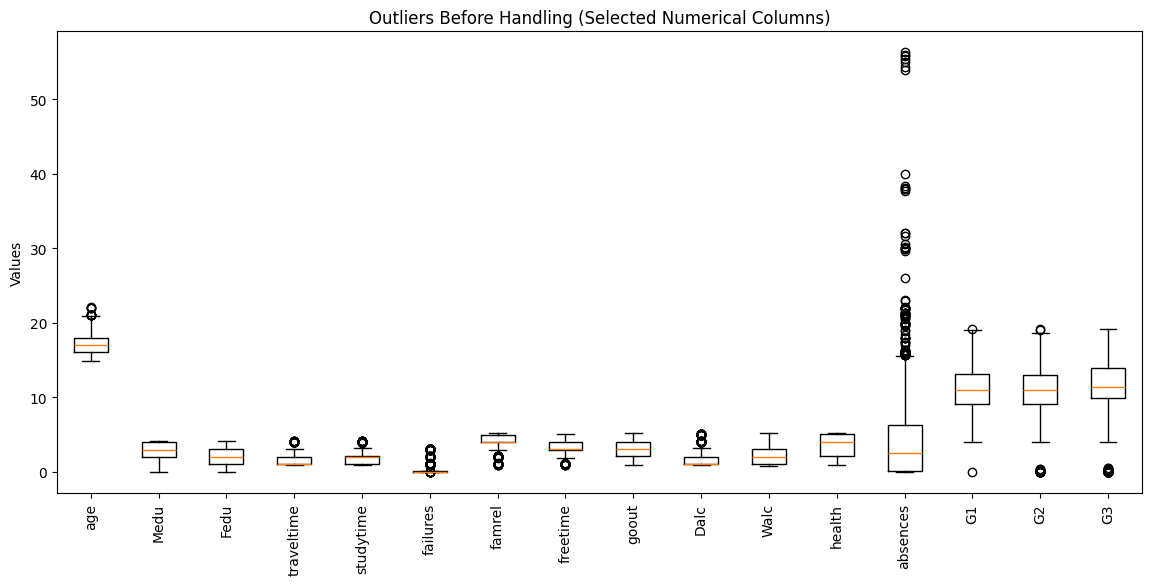

In [253]:
outlier_cols = [
    'age','Medu','Fedu','traveltime','studytime',
    'failures','famrel','freetime','goout',
    'Dalc','Walc','health','absences',
    'G1','G2','G3'
]
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.boxplot(
    [df[col].dropna() for col in outlier_cols],
    labels=outlier_cols
)

plt.xticks(rotation=90)
plt.title("Outliers Before Handling (Selected Numerical Columns)")
plt.ylabel("Values")
plt.show()



In [254]:
df_before = df.copy()


In [255]:
outlier_cols = [
    'age','Medu','Fedu','traveltime','studytime',
    'failures','famrel','freetime','goout',
    'Dalc','Walc','health','absences',
    'G1','G2','G3'
]
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR == 0:
        continue

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # تصليح القيم الشاذة
    df[col] = df[col].clip(lower, upper)


C:\Users\user\AppData\Local\Temp\ipykernel_15832\1768019810.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


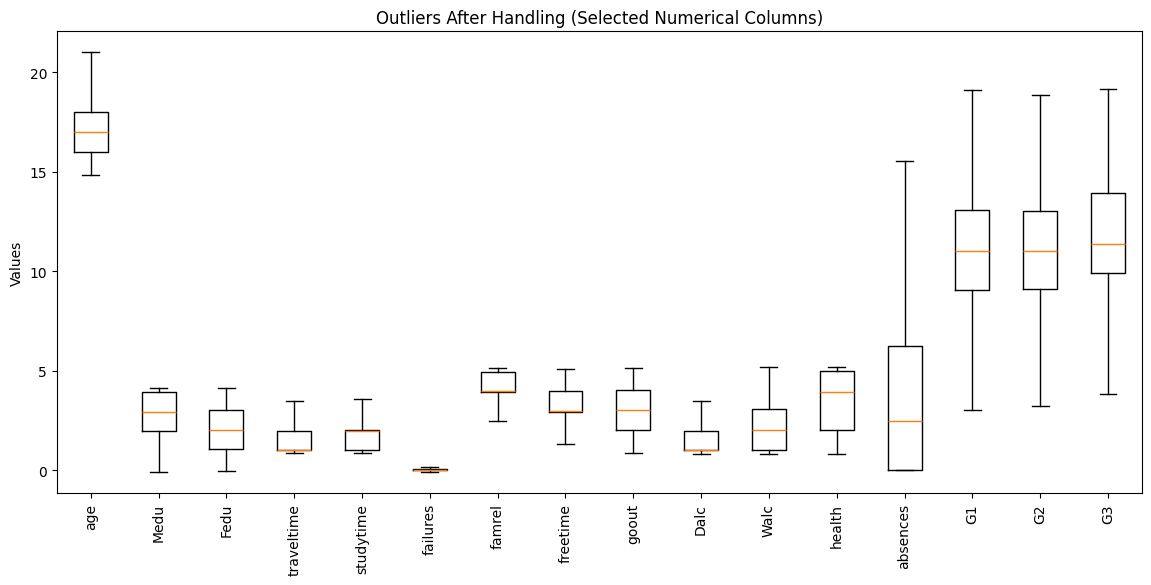

In [256]:
import matplotlib.pyplot as plt

outlier_cols = [
    'age','Medu','Fedu','traveltime','studytime',
    'failures','famrel','freetime','goout',
    'Dalc','Walc','health','absences',
    'G1','G2','G3'
]

plt.figure(figsize=(14,6))

plt.boxplot(
    [df[col].dropna() for col in outlier_cols],
    labels=outlier_cols
)

plt.xticks(rotation=90)
plt.title("Outliers After Handling (Selected Numerical Columns)")
plt.ylabel("Values")
plt.show()


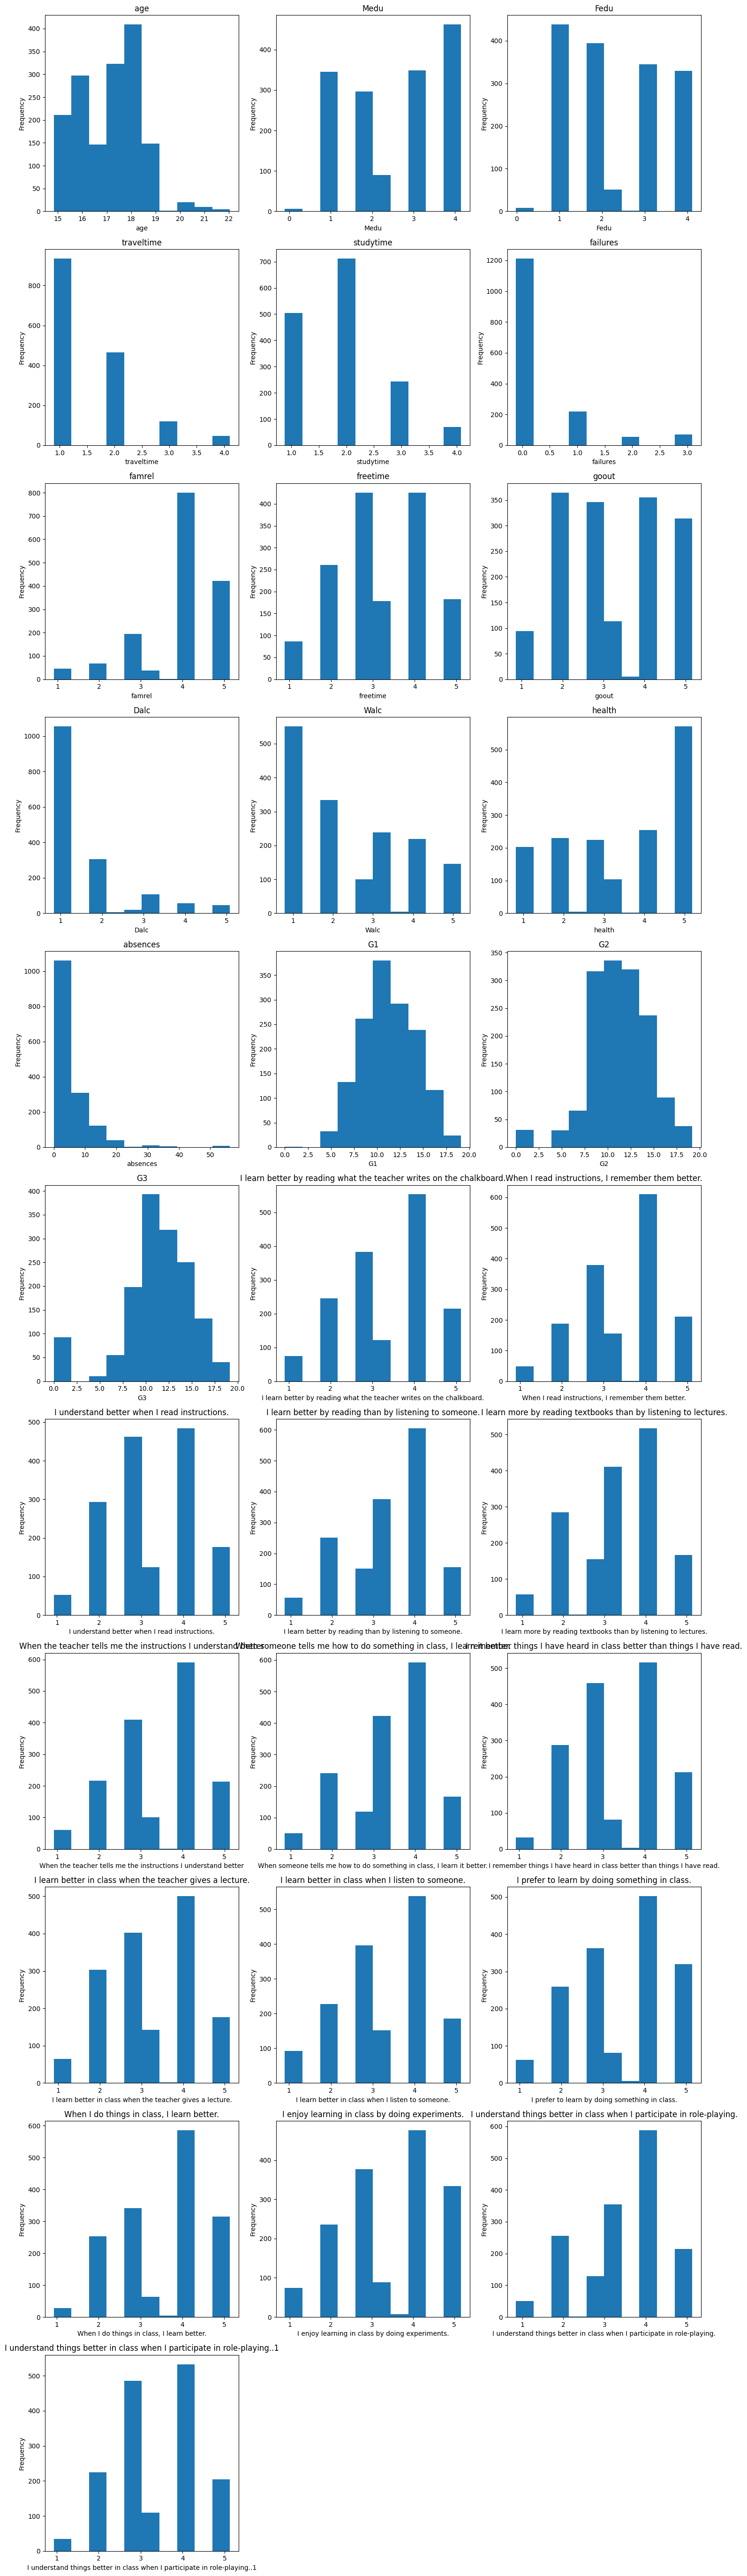

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv("student_dataset2.csv")

# اختيار الأعمدة الرقمية
num_cols = df.select_dtypes(include='number').columns

# تحديد عدد الصفوف والأعمدة
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


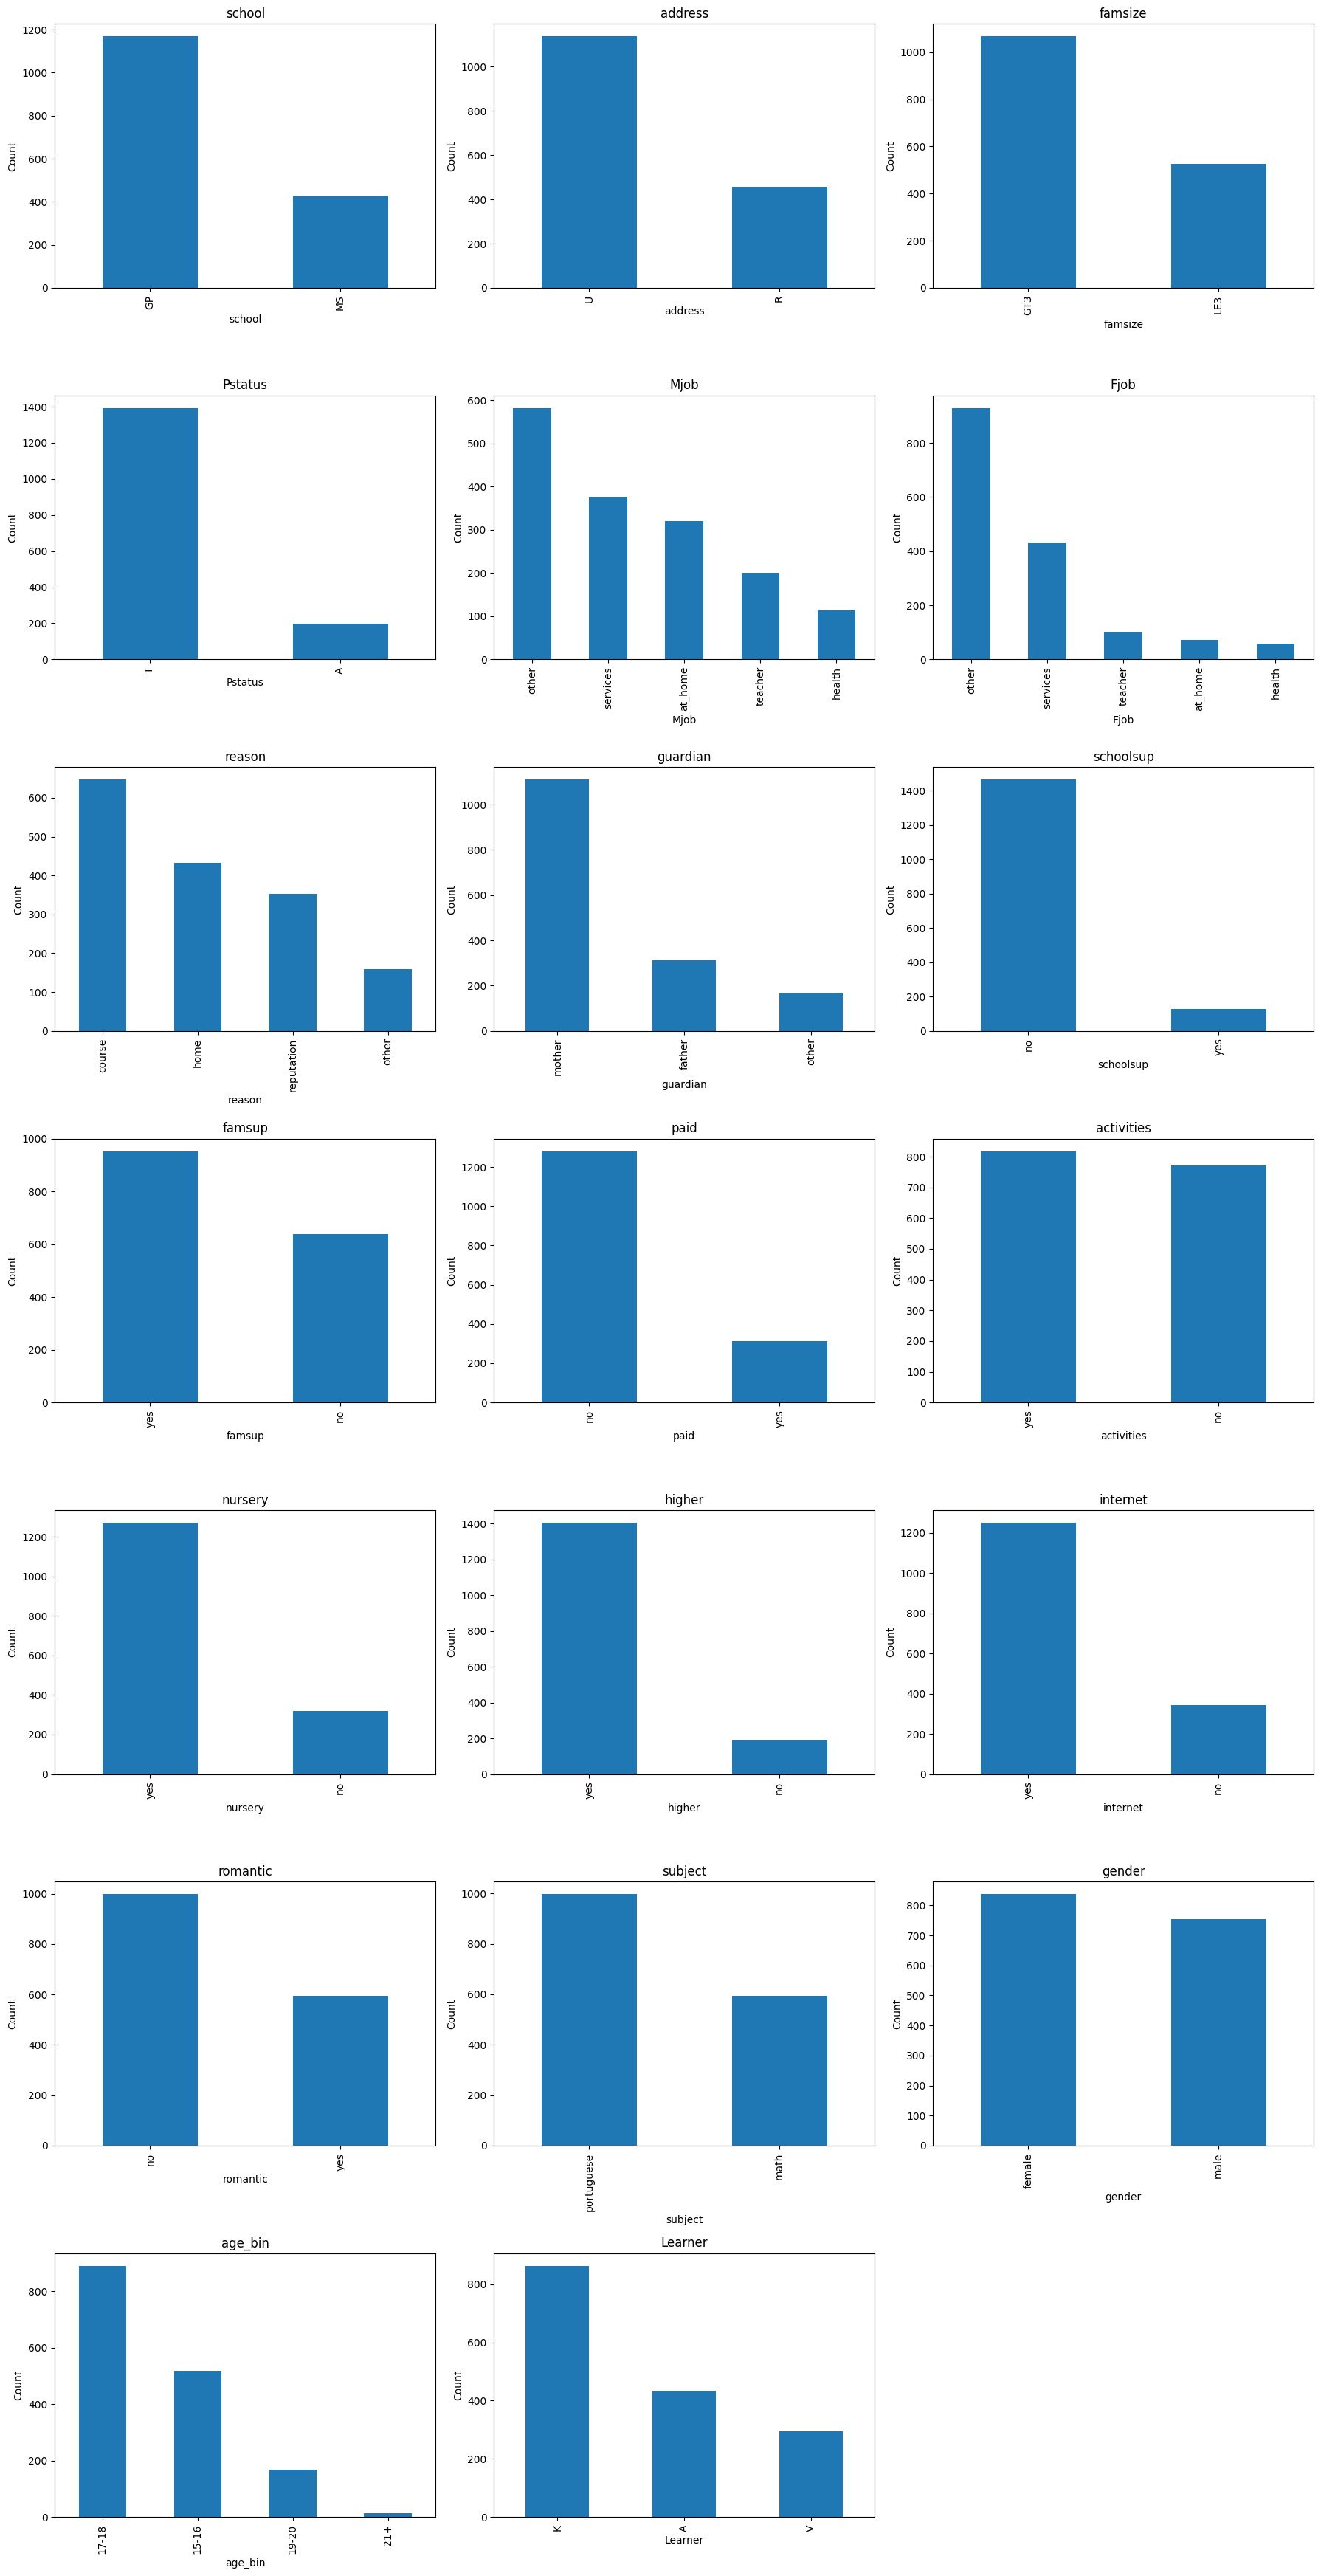

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv("student_dataset2.csv")

# اختيار الأعمدة الكاتيجوري
cat_cols = df.select_dtypes(include='object').columns

# تحديد شكل الجريد
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


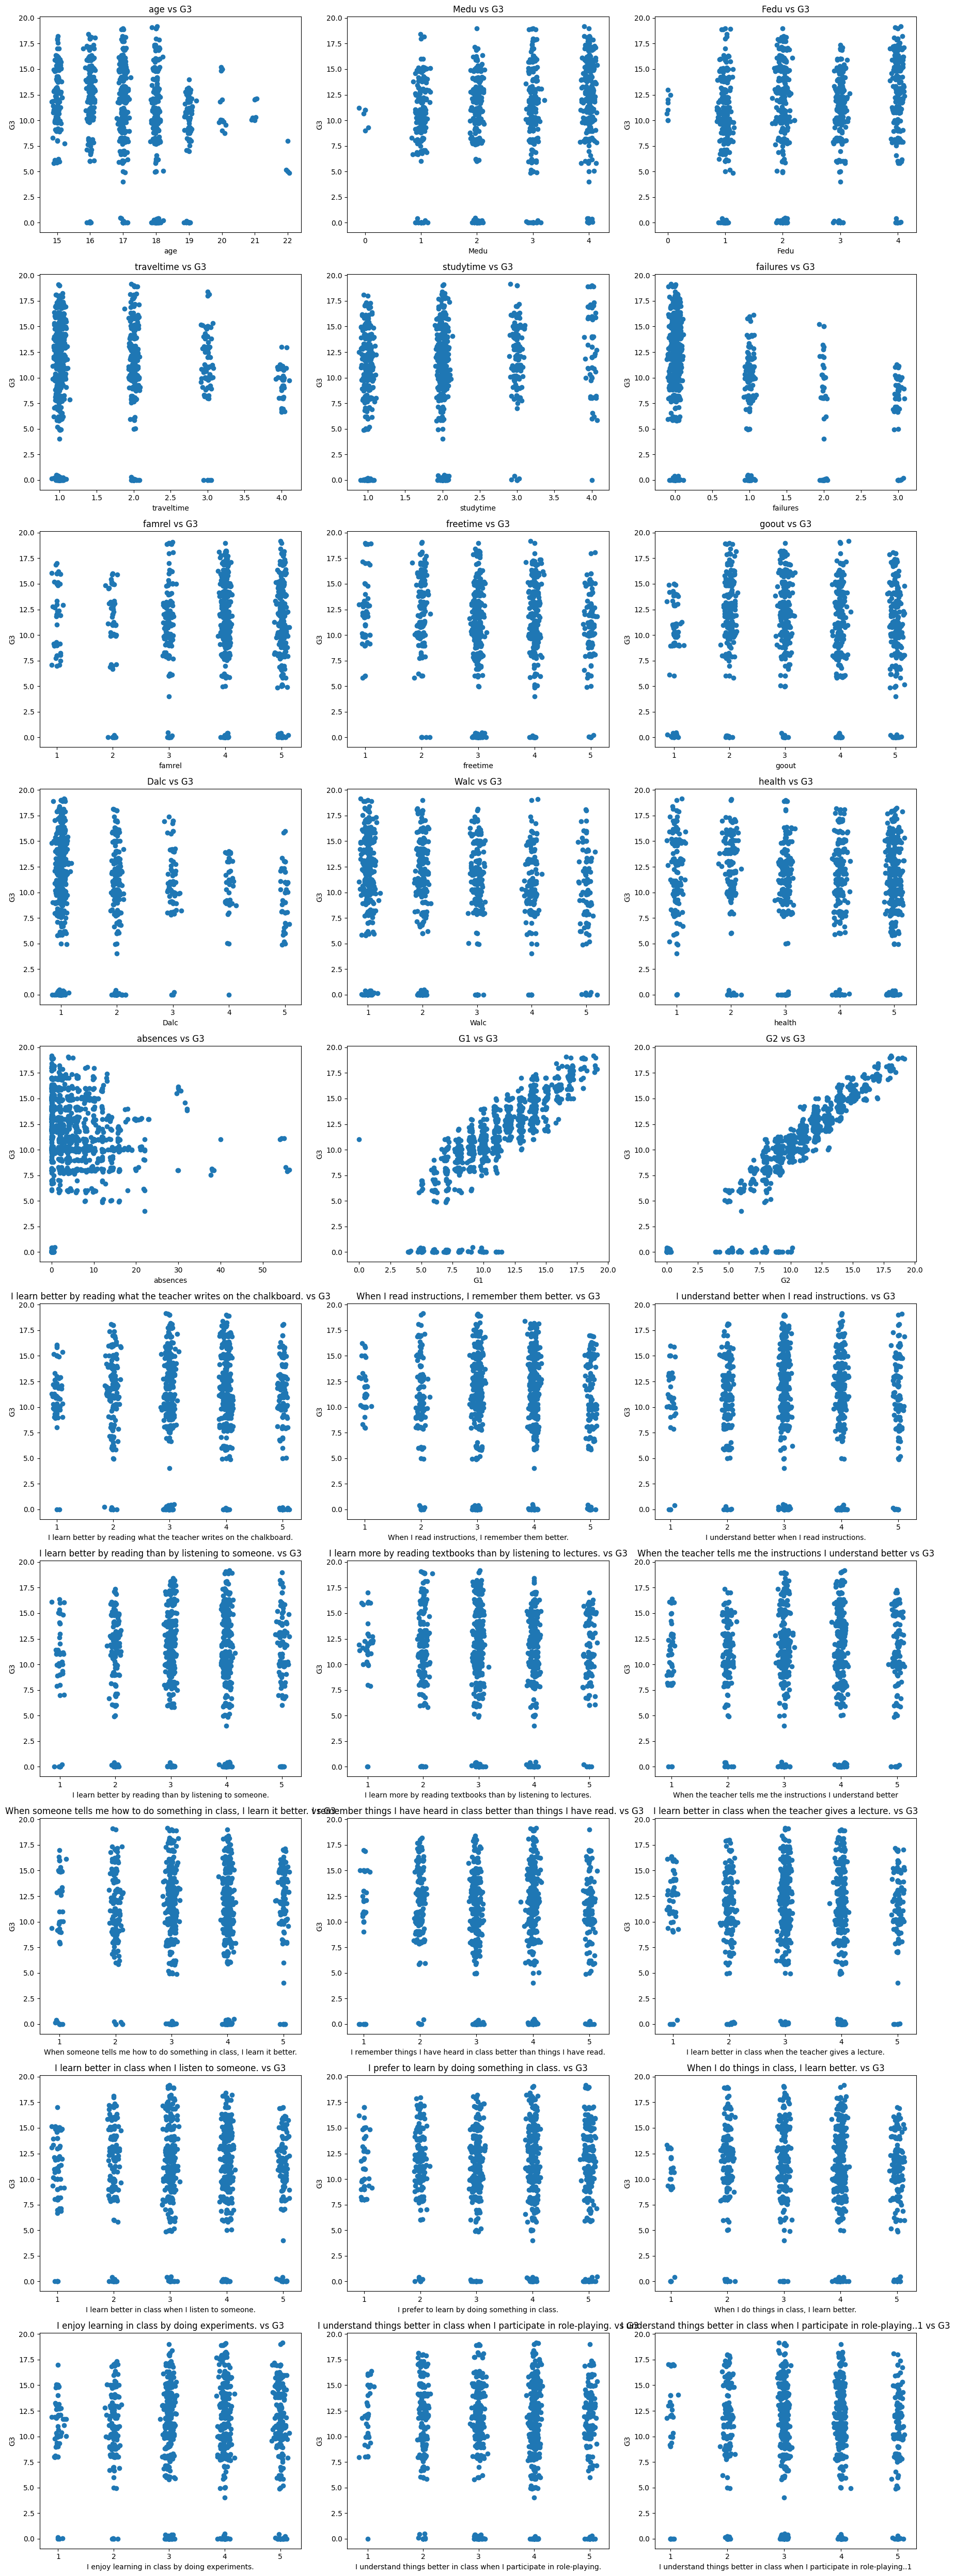

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv("student_dataset2.csv")

num_cols = df.select_dtypes(include='number').columns
target = 'G3'

num_cols = [col for col in num_cols if col != target]

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[col], df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'{col} vs {target}')

plt.tight_layout()
plt.show()


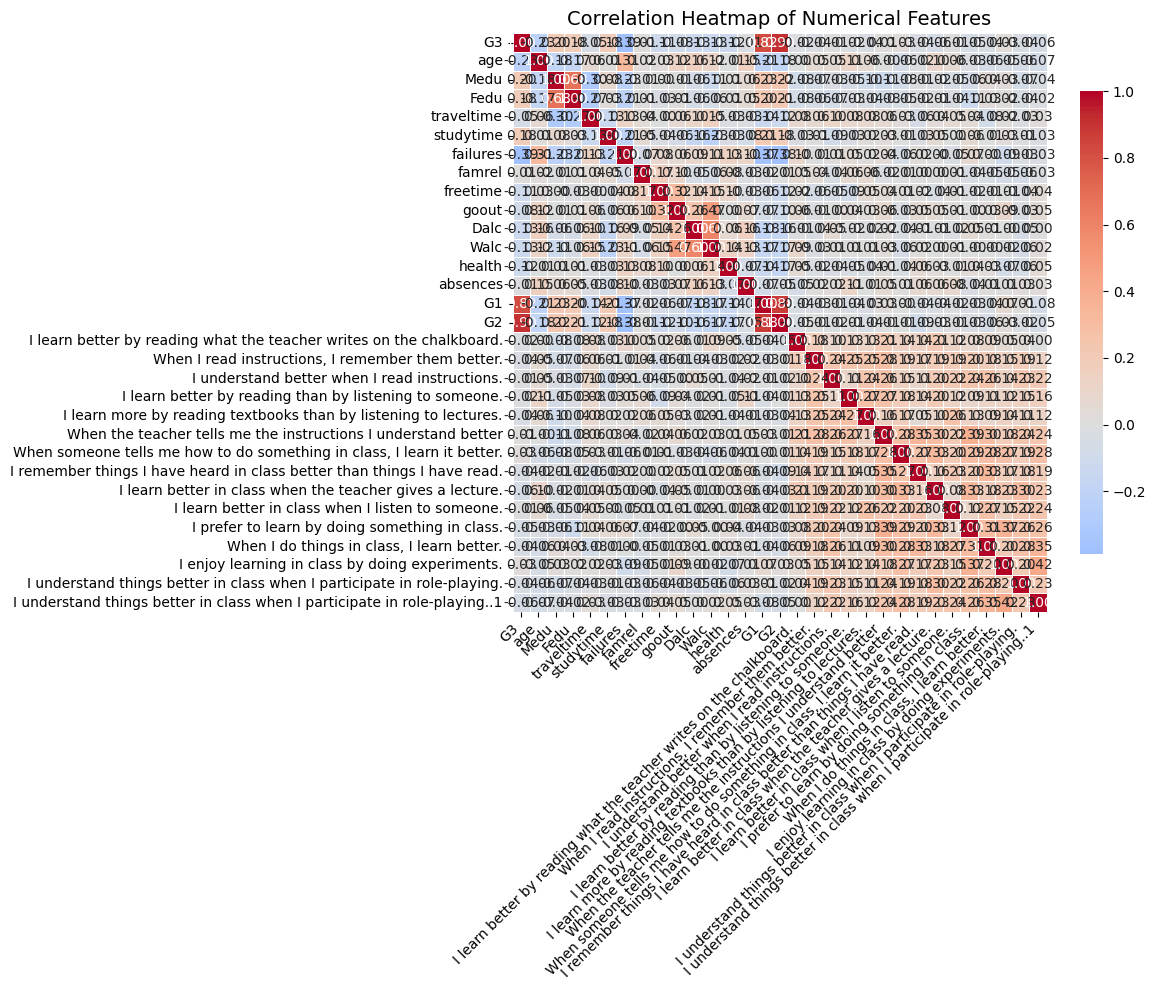

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



target = "G3"
num_cols = df.select_dtypes(include="number").columns
num_cols = [c for c in num_cols if c != target]

corr = df[[target] + num_cols].corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


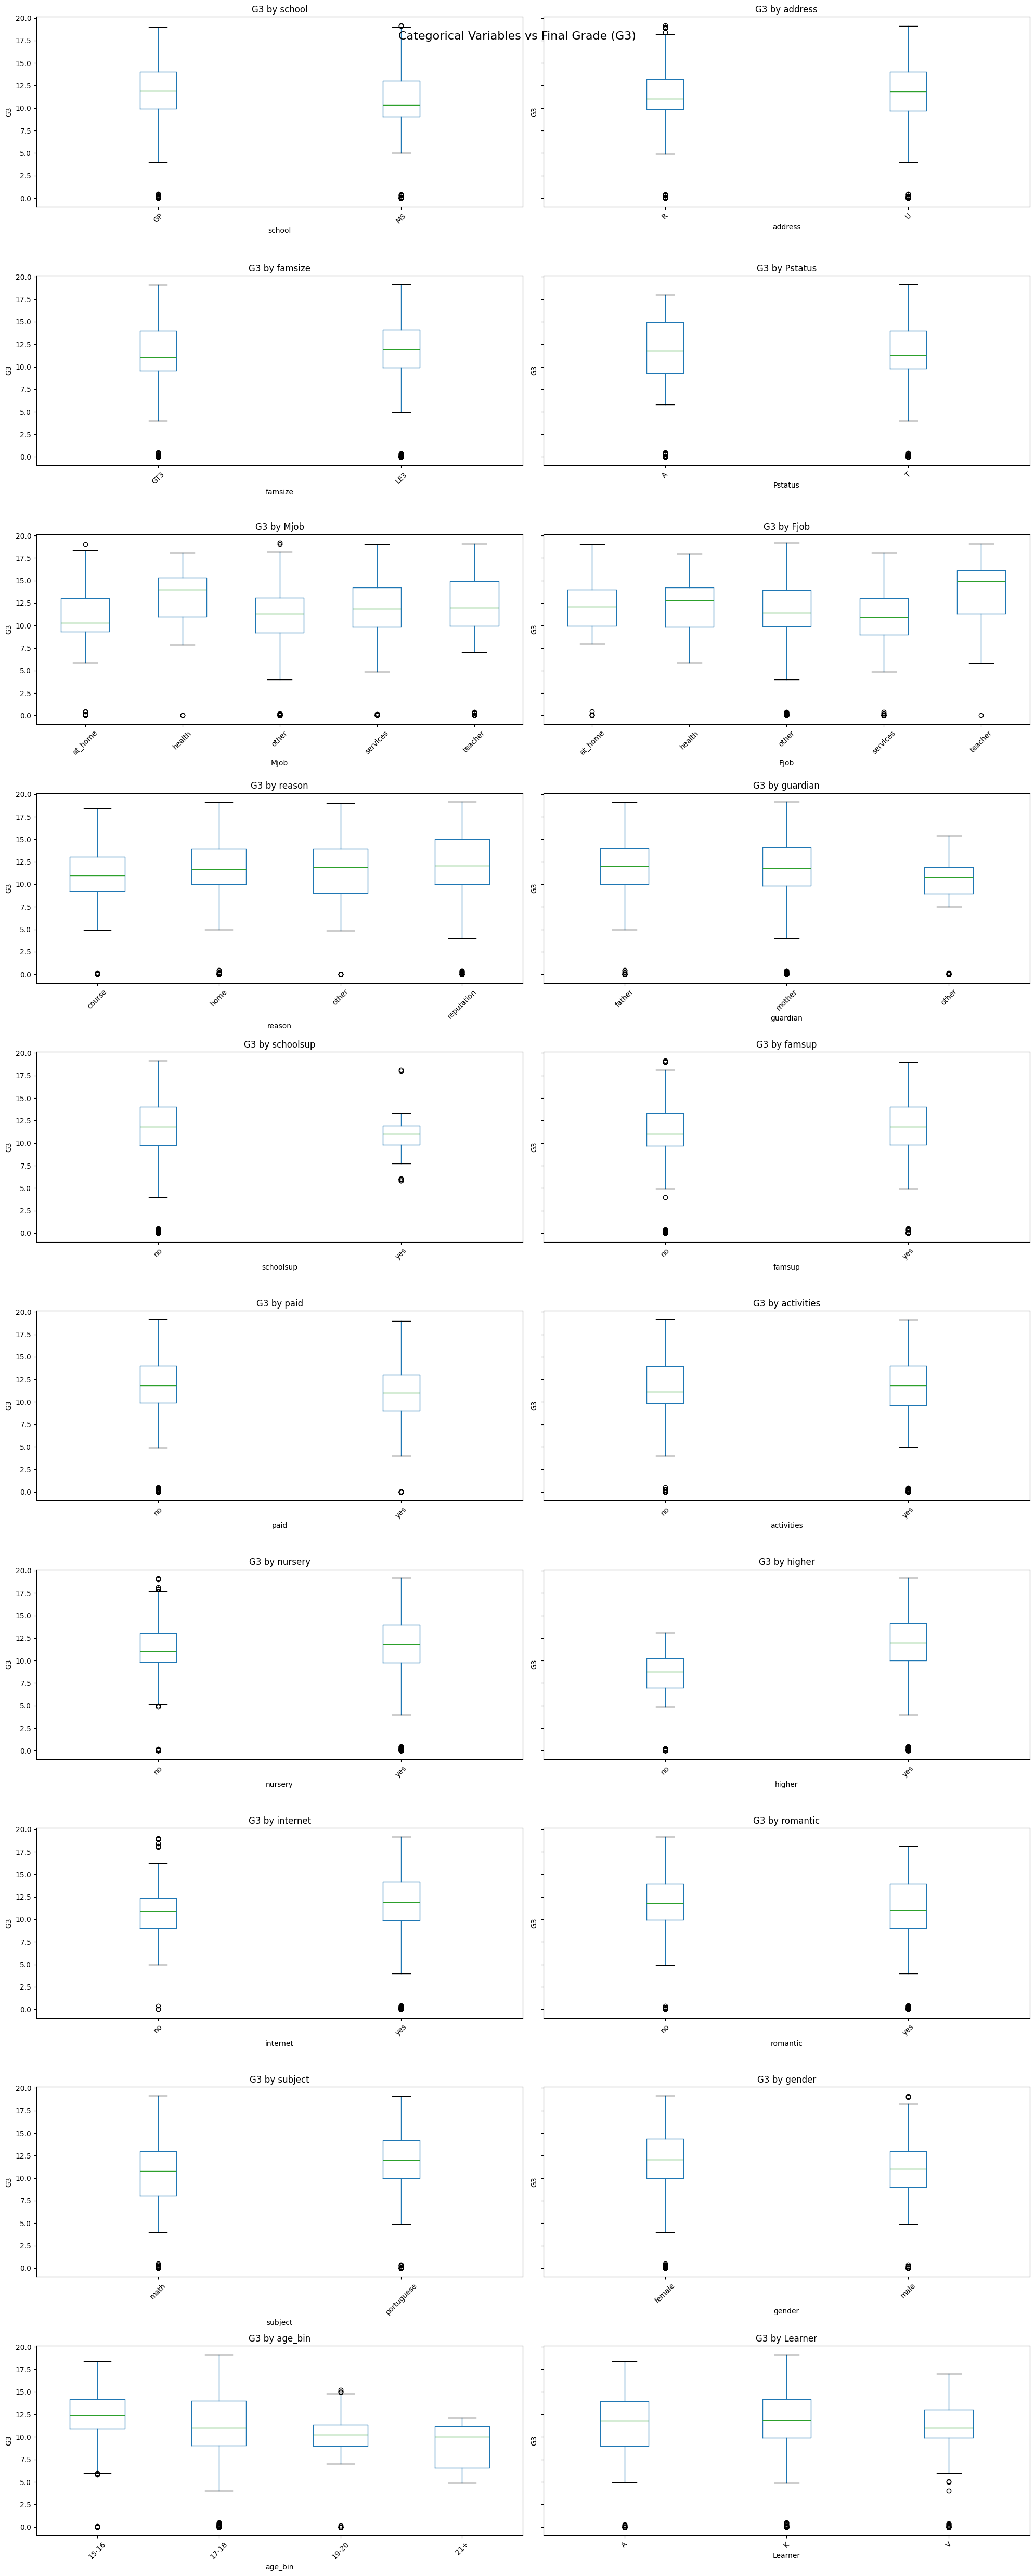

In [261]:
import math
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include='object').columns
target = 'G3'

n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(20, 5 * n_rows),
    sharey=True
)

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df.boxplot(
        column=target,
        by=col,
        ax=axes[i],
        grid=False
    )
    axes[i].set_title(f'{target} by {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].tick_params(axis='x', rotation=45)

# حذف أي subplot فاضي
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Categorical Variables vs Final Grade (G3)', fontsize=16)
plt.tight_layout()
plt.show()


In [262]:

df["Total_Alc"] = df["Dalc"] + df["Walc"]

# 2) Average grade of the student
df["Avg_Grade"] = (df["G1"] + df["G2"] + df["G3"]) / 3

# 3) Absence Risk Indicator (1 = high absences)
df["Absence_Risk"] = df["absences"].apply(lambda x: 1 if x > 10 else 0)

# 4) Parents' average education level
df["Parents_Edu"] = (df["Medu"] + df["Fedu"]) / 2

# 5) High Risk Failure (1 = student has failed before)
df["High_Risk_Failure"] = df["failures"].apply(lambda x: 1 if x >= 1 else 0)
df['Parents_Edu'] = df['Medu'] + df['Fedu']
# 6) Pass indicator (1 = passed final exam)
df["pass"] = df["G3"].apply(lambda x: 1 if x >= 10 else 0)

extra_cols = [
    
    'Avg_Grade',
    'Absence_Risk',
    'Total_Alc',
    'Parents_Edu',
    'High_Risk_Failure',
    'pass'
]

In [263]:
df.head()

school   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP  16.0       U     GT3       T   2.0   1.0     other     other   
1     GP  16.0       U     GT3       T   4.0   4.0  services  services   
2     GP  16.0       U     GT3       T   3.0   2.0     other     other   
3     MS  16.0       R     GT3       T   4.0   4.0   teacher   teacher   
4     GP  16.0       R     GT3       T   4.0   4.0    health   teacher   

       reason  ... I enjoy learning in class by doing experiments.  \
0        home  ...                                             4.0   
1  reputation  ...                                             4.0   
2  reputation  ...                                             5.0   
3      course  ...                                             5.0   
4       other  ...                                             4.0   

   I understand things better in class when I participate in role-playing.  \
0                                                3.0                         
1                                                4.0                         
2                                                5.0                         
3                                                5.0                         
4                                                2.0                         

   I understand things better in class when I participate in role-playing..1  \
0                                                3.0                           
1                                                3.0                           
2                                                5.0                           
3                                                2.0                           
4                                                3.0                           

   Learner Total_Alc  Avg_Grade Absence_Risk Parents_Edu High_Risk_Failure  \
0        A       2.0   9.666667            0         3.0                 0   
1        V       3.0  13.666667            0         8.0                 0   
2        K       3.0  12.333333            1         5.0                 0   
3        K       2.0  16.333333            0         8.0                 0   
4        K       5.0  16.333333            0         8.0                 0   

  pass  
0    1  
1    1  
2    1  
3    1  
4    1  

[5 rows x 57 columns]

In [264]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [265]:

target = 'G3'

X = df.drop(target, axis=1)
y = df[target]


num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)





In [266]:
X_prepared = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()

if hasattr(X_prepared, "toarray"):
    X_prepared = X_prepared.toarray()

X_prepared_df = pd.DataFrame(X_prepared, columns=feature_names)

X_prepared_df.head()


num__age  num__Medu  num__Fedu  num__traveltime  num__studytime  \
0 -0.835067  -0.519012  -1.211252        -0.708516       -1.128165   
1 -0.835067   1.229757   1.480514        -0.708516        1.320178   
2 -0.835067   0.355372  -0.313997        -0.708516        0.096007   
3 -0.835067   1.229757   1.480514         0.598190        1.320178   
4 -0.835067   1.229757   1.480514        -0.708516        0.096007   

   num__failures  num__famrel  num__freetime  num__goout  num__Dalc  ...  \
0      -0.457903     0.053042            NaN   -1.074151  -0.585642  ...   
1      -0.457903    -1.033677      -1.183214   -0.231008  -0.585642  ...   
2      -0.457903    -3.207116      -1.183214   -1.074151  -0.585642  ...   
3      -0.457903     0.053042      -1.183214   -1.074151  -0.585642  ...   
4      -0.457903    -2.120397       0.742729    0.612135   0.440699  ...   

   cat__higher_yes  cat__internet_yes  cat__romantic_yes  \
0              1.0                1.0                1.0   
1              1.0                1.0                0.0   
2              1.0                1.0                0.0   
3              1.0                1.0                1.0   
4              1.0                0.0                0.0   

   cat__subject_portuguese  cat__gender_male  cat__age_bin_17-18  \
0                      1.0               0.0                 0.0   
1                      0.0               0.0                 0.0   
2                      0.0               0.0                 0.0   
3                      1.0               0.0                 0.0   
4                      1.0               0.0                 0.0   

   cat__age_bin_19-20  cat__age_bin_21+  cat__Learner_K  cat__Learner_V  
0                 0.0               0.0             0.0             0.0  
1                 0.0               0.0             0.0             1.0  
2                 0.0               0.0             1.0             0.0  
3                 0.0               0.0             1.0             0.0  
4                 0.0               0.0             1.0             0.0  

[5 rows x 68 columns]

In [267]:


df.head()

school   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP  16.0       U     GT3       T   2.0   1.0     other     other   
1     GP  16.0       U     GT3       T   4.0   4.0  services  services   
2     GP  16.0       U     GT3       T   3.0   2.0     other     other   
3     MS  16.0       R     GT3       T   4.0   4.0   teacher   teacher   
4     GP  16.0       R     GT3       T   4.0   4.0    health   teacher   

       reason  ... I enjoy learning in class by doing experiments.  \
0        home  ...                                             4.0   
1  reputation  ...                                             4.0   
2  reputation  ...                                             5.0   
3      course  ...                                             5.0   
4       other  ...                                             4.0   

   I understand things better in class when I participate in role-playing.  \
0                                                3.0                         
1                                                4.0                         
2                                                5.0                         
3                                                5.0                         
4                                                2.0                         

   I understand things better in class when I participate in role-playing..1  \
0                                                3.0                           
1                                                3.0                           
2                                                5.0                           
3                                                2.0                           
4                                                3.0                           

   Learner Total_Alc  Avg_Grade Absence_Risk Parents_Edu High_Risk_Failure  \
0        A       2.0   9.666667            0         3.0                 0   
1        V       3.0  13.666667            0         8.0                 0   
2        K       3.0  12.333333            1         5.0                 0   
3        K       2.0  16.333333            0         8.0                 0   
4        K       5.0  16.333333            0         8.0                 0   

  pass  
0    1  
1    1  
2    1  
3    1  
4    1  

[5 rows x 57 columns]

In [268]:
TARGET = "G3"
TEST_SIZE = 0.2
RANDOM_STATE = 42

CORR_THRESHOLD = 0.2
TOPN_PLOT_CORR = 20
TOPN_PLOT_LASSO = 25
RFE_SELECT = 10
RFE_PREFILTER_TOPK = 50


In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)


In [270]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

cat_cols = X_train.select_dtypes(include=["object", "category"]).columns
num_cols = X_train.columns.difference(cat_cols)

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)


In [271]:
X_train_enc = preprocess.fit_transform(X_train)
feature_names = preprocess.get_feature_names_out()

# convert to DataFrame (for correlation & plotting)
if hasattr(X_train_enc, "toarray"):
    X_train_enc = X_train_enc.toarray()

X_train_enc_df = pd.DataFrame(
    X_train_enc,
    columns=feature_names,
    index=X_train.index
)


In [272]:
corr_all = pd.concat([X_train_enc_df, y_train], axis=1).corr(numeric_only=True)
corr_target = corr_all[TARGET].abs().drop(TARGET).sort_values(ascending=False)

selected_filter = corr_target[corr_target > CORR_THRESHOLD].index.tolist()

print("========== FILTER ==========")
print(corr_target.head(15))
print("Selected:", selected_filter)


========== FILTER ==========
num__Avg_Grade             0.883340
num__G2                    0.877075
num__G1                    0.796314
num__pass                  0.739827
num__failures              0.398730
num__High_Risk_Failure     0.381453
cat__higher_yes            0.331373
cat__higher_no             0.331373
num__age                   0.253604
cat__subject_portuguese    0.230876
cat__subject_math          0.230876
num__studytime             0.208505
cat__age_bin_15-16         0.201318
num__Medu                  0.200490
num__Parents_Edu           0.194757
Name: G3, dtype: float64
Selected: ['num__Avg_Grade', 'num__G2', 'num__G1', 'num__pass', 'num__failures', 'num__High_Risk_Failure', 'cat__higher_yes', 'cat__higher_no', 'num__age', 'cat__subject_portuguese', 'cat__subject_math', 'num__studytime', 'cat__age_bin_15-16', 'num__Medu']


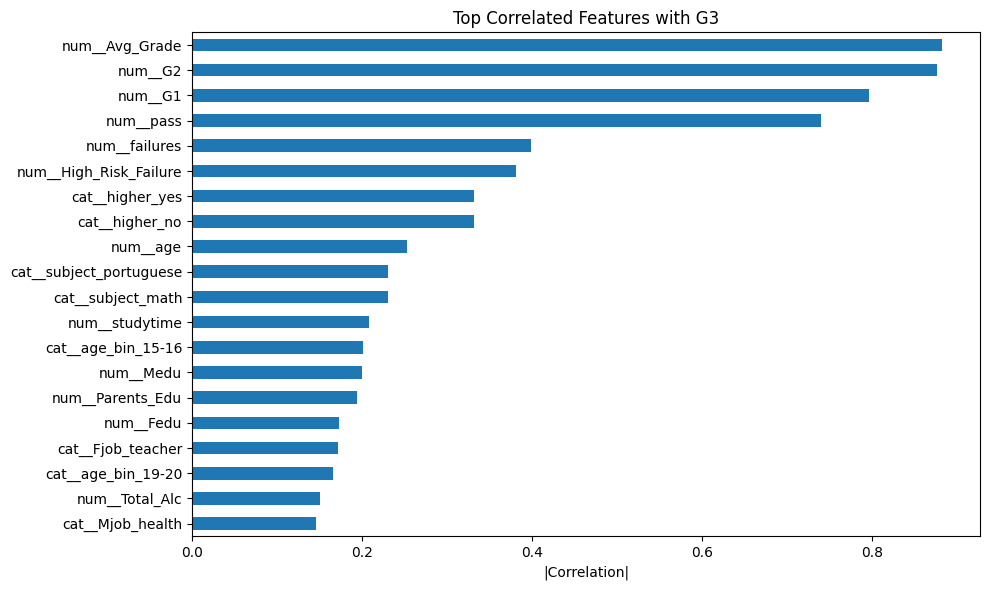

In [273]:
import matplotlib.pyplot as plt

corr_target.head(TOPN_PLOT_CORR).iloc[::-1].plot(
    kind="barh", figsize=(10, 6)
)
plt.title(f"Top Correlated Features with {TARGET}")
plt.xlabel("|Correlation|")
plt.tight_layout()
plt.show()


In [274]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])


In [275]:
df.isna().sum()[df.isna().sum() > 0]


Series([], dtype: int64)

In [276]:
X = df.drop("G3", axis=1)
y = df["G3"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [277]:
print("NaN in y_train:", y_train.isna().sum())


NaN in y_train: 0


In [278]:
from sklearn.linear_model import LassoCV
import numpy as np

lasso = LassoCV(
    cv=5,
    random_state=RANDOM_STATE,
    max_iter=20000
)
lasso.fit(X_train_enc_df, y_train)

lasso_coef = pd.Series(lasso.coef_, index=feature_names)
selected_lasso = lasso_coef[lasso_coef != 0].sort_values(
    key=np.abs, ascending=False
)

print("========== LASSO ==========")
print("Alpha:", lasso.alpha_)
print(selected_lasso)


========== LASSO ==========
Alpha: 0.011231150700216823
num__Avg_Grade                                                                    1.878025e+00
num__G2                                                                           1.037335e+00
num__pass                                                                         7.551484e-01
cat__subject_math                                                                -6.528764e-01
num__absences                                                                     3.354014e-01
cat__higher_no                                                                   -3.169003e-01
cat__romantic_no                                                                  3.165336e-01
cat__address_R                                                                   -2.808124e-01
cat__reason_course                                                                2.155050e-01
cat__school_GP                                                                   -2.10387

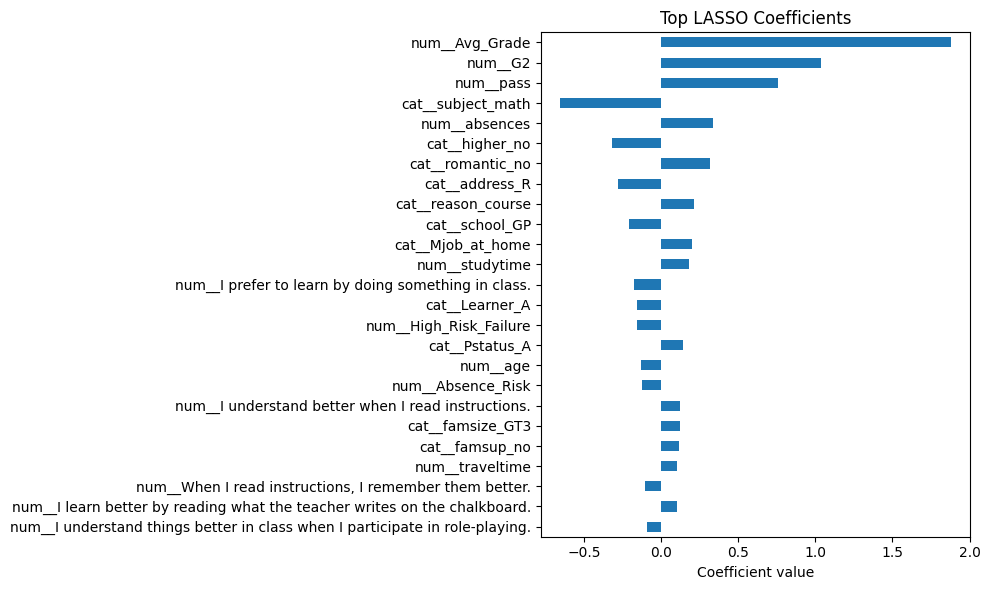

In [279]:
selected_lasso.head(TOPN_PLOT_LASSO).iloc[::-1].plot(
    kind="barh", figsize=(10, 6)
)
plt.title("Top LASSO Coefficients")
plt.xlabel("Coefficient value")
plt.tight_layout()
plt.show()


In [280]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# prefilter using correlation
prefilter = corr_target.head(RFE_PREFILTER_TOPK).index
X_rfe = X_train_enc_df[prefilter]

rfe = RFE(
    estimator=LinearRegression(),
    n_features_to_select=RFE_SELECT
)
rfe.fit(X_rfe, y_train)

selected_rfe = X_rfe.columns[rfe.support_]

print("========== RFE ==========")
print(list(selected_rfe))


========== RFE ==========
['num__Avg_Grade', 'num__G2', 'num__pass', 'cat__higher_no', 'cat__subject_portuguese', 'cat__subject_math', 'cat__age_bin_15-16', 'cat__Fjob_teacher', 'cat__Mjob_at_home', 'cat__age_bin_21+']


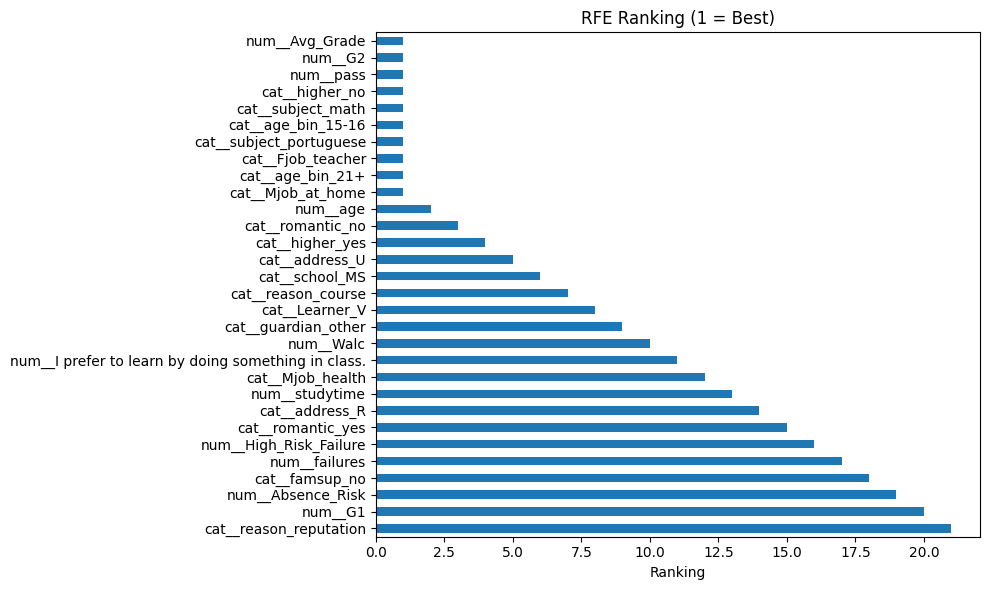

In [281]:
rfe_rank = pd.Series(rfe.ranking_, index=X_rfe.columns).sort_values()

rfe_rank.head(30).iloc[::-1].plot(
    kind="barh", figsize=(10, 6)
)
plt.title("RFE Ranking (1 = Best)")
plt.xlabel("Ranking")
plt.tight_layout()
plt.show()


In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



# اختاري متغيرات رقمية (عدّلي القائمة حسب اللي عندك)
numeric_vars = ["age", "studytime", "absences", "G1", "G2", "G3"]


In [283]:
def fit_dist_ks(x, dist, dist_name):
    params = dist.fit(x)
    ks_stat, ks_p = stats.kstest(x, dist_name, args=params)
    return params, ks_stat, ks_p

fit_table = []

for col in numeric_vars:
    x = df[col].dropna().values

    for dist_name, dist in [("norm", stats.norm),
                            ("lognorm", stats.lognorm),
                            ("expon", stats.expon)]:
        params, ks_stat, ks_p = fit_dist_ks(x, dist, dist_name)
        fit_table.append([col, dist_name, ks_stat, ks_p, params])

fit_df = pd.DataFrame(fit_table, columns=["variable", "distribution", "KS_stat", "KS_pvalue", "params"])
fit_df.sort_values(["variable", "KS_pvalue"], ascending=[True, False]).head(30)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6930: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6930: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


variable distribution   KS_stat      KS_pvalue  \
10         G1      lognorm  0.073430   6.544018e-08   
9          G1         norm  0.080088   2.495145e-09   
11         G1        expon  0.404770  3.919164e-236   
12         G2         norm  0.063638   4.768350e-06   
14         G2        expon  0.418560  3.285780e-253   
13         G2      lognorm  0.518119   0.000000e+00   
15         G3         norm  0.123164   1.662346e-21   
17         G3        expon  0.399855  3.272717e-230   
16         G3      lognorm  0.524062   0.000000e+00   
6    absences         norm  0.235052   7.545066e-78   
8    absences        expon  0.242513   6.578825e-83   
7    absences      lognorm  0.465698  7.541820e-317   
0         age         norm  0.117529   1.287803e-19   
1         age      lognorm  0.134461   1.457243e-25   
2         age        expon  0.276299  6.348778e-108   
3   studytime         norm  0.219808   5.002123e-68   
4   studytime      lognorm  0.272167  1.117640e-104   
5   studytime        expon  0.309849  3.044549e-136   

                                               params  
10  (0.03344522110204301, -76.12835641737757, 87.3...  
9             (11.227597392577673, 2.922126606170639)  
11                          (0.0, 11.227597392577673)  
12             (11.188592249267495, 3.18463664054363)  
14                          (0.0, 11.188592249267495)  
13  (78.96068497856312, -5e-324, 0.002287288969829...  
15            (11.214936241171525, 3.868099531985573)  
17                          (0.0, 11.214936241171525)  
16  (147.78998556898344, -5e-324, 6.09613844764794...  
6              (4.779393921409669, 6.616811269292045)  
8                            (0.0, 4.779393921409669)  
7   (318.1535301729035, -5e-324, 1.070503388219502...  
0             (17.06938218024212, 1.2725477986463105)  
1   (0.08710330487058202, 2.474728892006693, 14.53...  
2            (14.830511045542083, 2.2388711347000356)  
3             (1.924579231417647, 0.8012174456077849)  
4   (0.506291408519457, 0.24409508882185027, 1.488...  
5             (0.885246320136181, 1.0393329112814662)

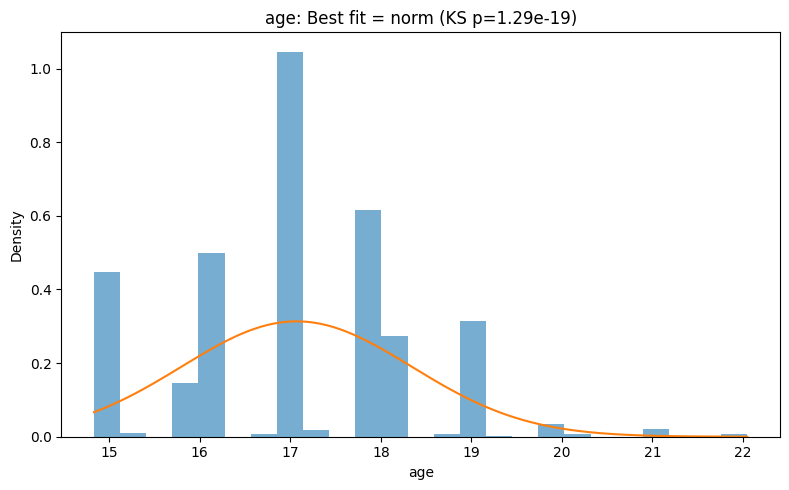

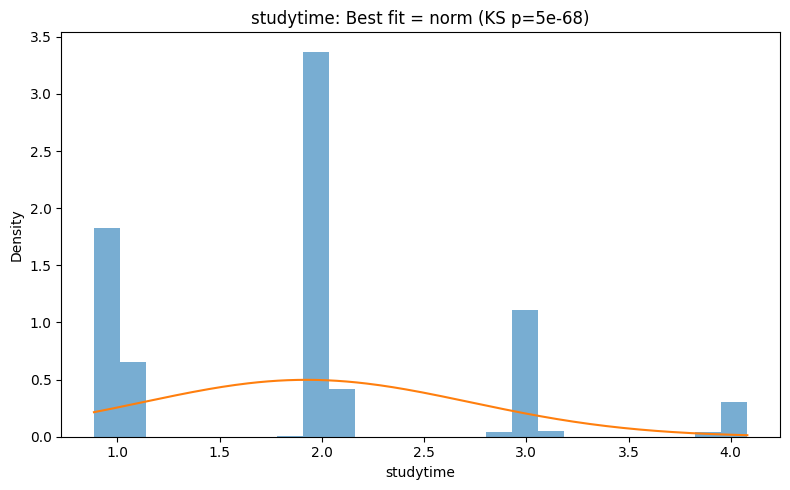

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6930: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


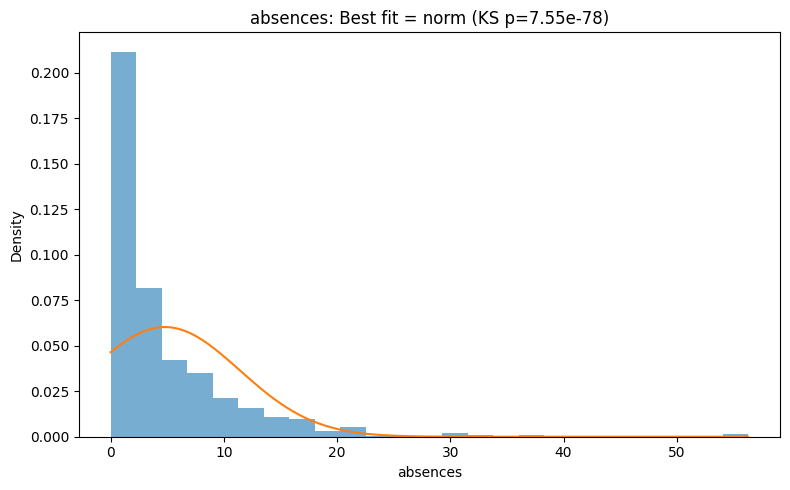

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6930: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


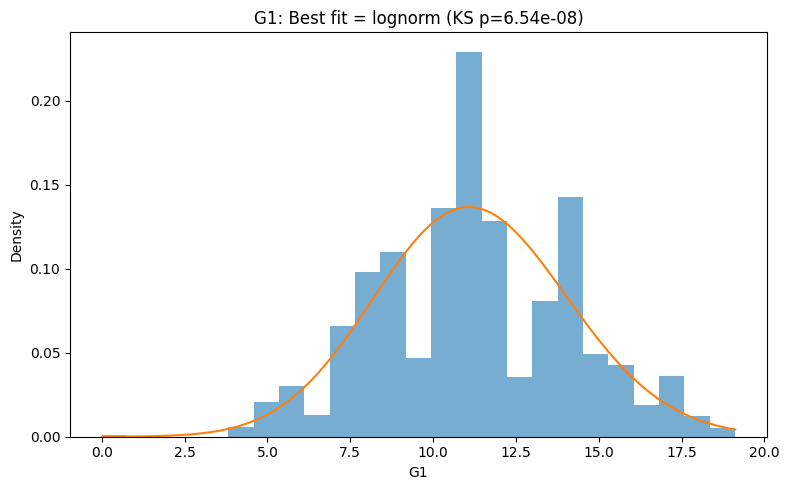

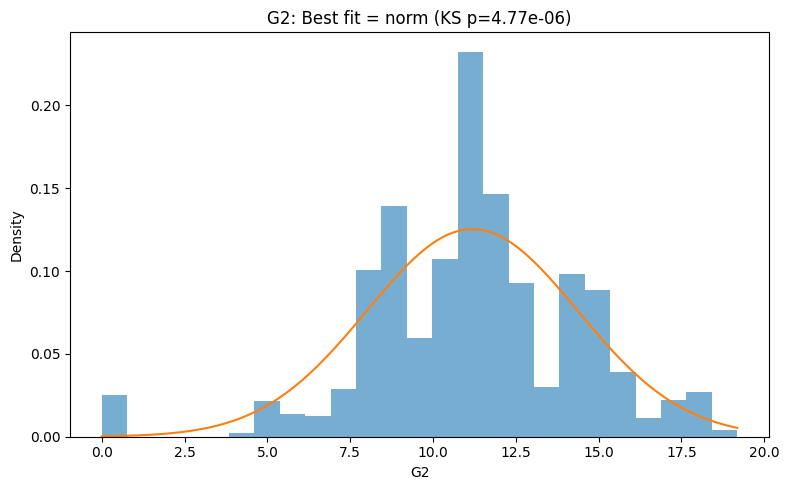

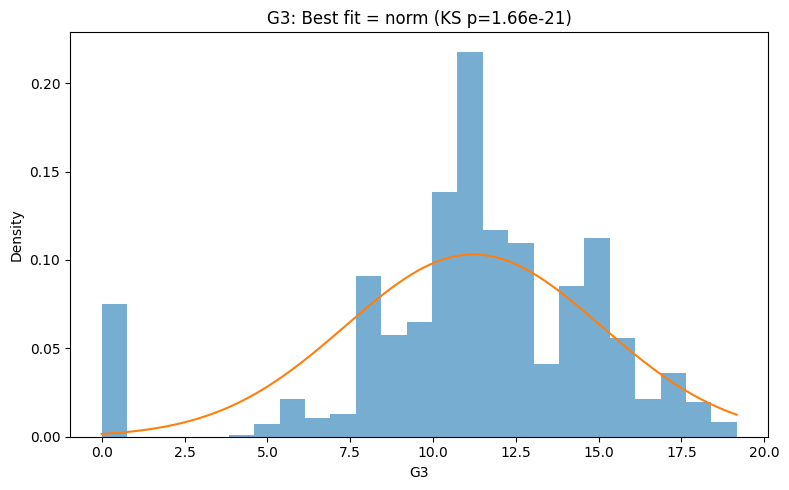

In [284]:
def plot_best_fit(col):
    x = df[col].dropna().values

    candidates = [("norm", stats.norm), ("lognorm", stats.lognorm), ("expon", stats.expon)]
    best = None

    for name, dist in candidates:
        params = dist.fit(x)
        ks_stat, ks_p = stats.kstest(x, name, args=params)
        if (best is None) or (ks_p > best["p"]):
            best = {"name": name, "dist": dist, "params": params, "p": ks_p}

    xs = np.linspace(np.min(x), np.max(x), 200)
    pdf = best["dist"].pdf(xs, *best["params"])

    plt.figure(figsize=(8,5))
    plt.hist(x, bins=25, density=True, alpha=0.6)
    plt.plot(xs, pdf)
    plt.title(f"{col}: Best fit = {best['name']} (KS p={best['p']:.3g})")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

for c in numeric_vars:
    plot_best_fit(c)


In [285]:
def prob_gt_normal(col, threshold):
    x = df[col].dropna().values
    mu, sigma = stats.norm.fit(x)
    return 1 - stats.norm.cdf(threshold, mu, sigma), mu, sigma

p_age_gt18, mu_age, sd_age = prob_gt_normal("age", 18)
p_abs_gt10, mu_abs, sd_abs = prob_gt_normal("absences", 10)
p_g2_gt12, mu_g2, sd_g2   = prob_gt_normal("G2", 12)

p_age_gt18, p_abs_gt10, p_g2_gt12


(np.float64(0.2322970979521798),
 np.float64(0.21505856543985513),
 np.float64(0.39944335529993813))

In [286]:
def prob_gt_empirical(col, threshold):
    x = df[col].dropna().values
    return np.mean(x > threshold)

prob_gt_empirical("absences", 10), prob_gt_empirical("G3", 15)


(np.float64(0.1350502512562814), np.float64(0.1306532663316583))

In [287]:
x = df["studytime"].dropna().values
t_stat, p_val = stats.ttest_1samp(x, 2)
t_stat, p_val


(np.float64(-3.754703492593867), np.float64(0.00017979302834579238))

In [288]:
g2_fail = df[df["failures"] > 0]["G2"].dropna().values
g2_no   = df[df["failures"] == 0]["G2"].dropna().values

t_stat, p_val = stats.ttest_ind(g2_fail, g2_no, equal_var=False)
t_stat, p_val


(np.float64(-6.524938870176916), np.float64(1.0152676548962372e-10))

In [289]:
cont = pd.crosstab(df["gender"], df["pass"])
chi2, p, dof, expected = stats.chi2_contingency(cont)
chi2, p, dof


(np.float64(12.06956750246327), np.float64(0.0005125158914419208), 1)

In [290]:
abs_pass = df[df["pass"] == 1]["absences"].dropna().values
abs_fail = df[df["pass"] == 0]["absences"].dropna().values

u_stat, p_val = stats.mannwhitneyu(abs_pass, abs_fail, alternative="two-sided")
u_stat, p_val


(np.float64(265161.0), np.float64(0.0711551004343172))

In [291]:
def bootstrap_ci(x, stat_func=np.mean, n_boot=5000, alpha=0.05):
    x = np.array(x)
    boots = [stat_func(np.random.choice(x, size=len(x), replace=True)) for _ in range(n_boot)]
    return (np.percentile(boots, 100*alpha/2),
            np.percentile(boots, 100*(1-alpha/2)))

ci_g3_mean = bootstrap_ci(df["G3"].dropna().values, np.mean)
ci_abs_med = bootstrap_ci(df["absences"].dropna().values, np.median)

ci_g3_mean, ci_abs_med


((np.float64(11.028138495181144), np.float64(11.402828131174273)),
 (np.float64(2.241368380628731), np.float64(3.0)))

In [292]:
def cohens_d(x, y):
    x = np.array(x); y = np.array(y)
    nx, ny = len(x), len(y)
    pooled = np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / pooled

g3_fail = df[df["failures"] > 0]["G3"].dropna().values
g3_no   = df[df["failures"] == 0]["G3"].dropna().values

d = cohens_d(g3_no, g3_fail)
d


np.float64(0.4002149138375007)

In [293]:
tmp = df[["studytime", "G3"]].dropna()

pearson_r, pearson_p = stats.pearsonr(tmp["studytime"], tmp["G3"])
spearman_r, spearman_p = stats.spearmanr(tmp["studytime"], tmp["G3"])

pearson_r, pearson_p, spearman_r, spearman_p


(np.float64(0.17068197893521056),
 np.float64(7.121228821054491e-12),
 np.float64(0.18336688119195557),
 np.float64(1.666190910737501e-13))

G1    11.227597
G2    11.188592
G3    11.214936
dtype: float64


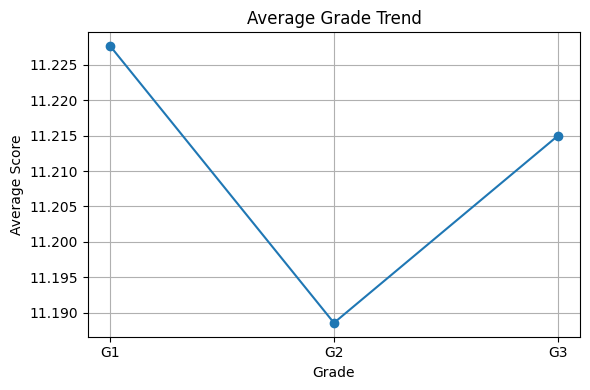

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Drop missing grades
grades = df[["G1", "G2", "G3"]].dropna()

# Mean trend
mean_trend = grades.mean()

print(mean_trend)

# Plot grade trend
plt.figure(figsize=(6,4))
plt.plot(["G1", "G2", "G3"], mean_trend.values, marker="o")
plt.title("Average Grade Trend")
plt.xlabel("Grade")
plt.ylabel("Average Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [295]:
# Basic attendance features
df["high_absence"] = (df["absences"] > 10).astype(int)
df["absence_rate"] = df["absences"] / df["absences"].max()

attendance_features = df[["absences", "high_absence", "absence_rate"]].describe()
attendance_features


absences  high_absence  absence_rate
count  1592.000000   1592.000000   1592.000000
mean      4.779394      0.135050      0.084887
std       6.618890      0.341885      0.117558
min       0.000000      0.000000      0.000000
25%       0.043936      0.000000      0.000780
50%       2.500951      0.000000      0.044419
75%       6.385150      0.000000      0.113407
max      56.303079      1.000000      1.000000

In [296]:
# Ensure needed columns
tmp = df[["studytime", "pass"]].dropna()

# Conditional probability P(pass | studytime)
p_pass_given_study = (
    tmp.groupby("studytime")["pass"]
    .mean()
)

print("P(pass | studytime):")
print(p_pass_given_study)


P(pass | studytime):
studytime
0.885246    1.0
0.901969    0.0
0.907174    1.0
0.907793    1.0
0.909686    1.0
           ... 
4.057002    0.0
4.060263    0.0
4.062214    1.0
4.071272    0.0
4.081196    0.0
Name: pass, Length: 966, dtype: float64


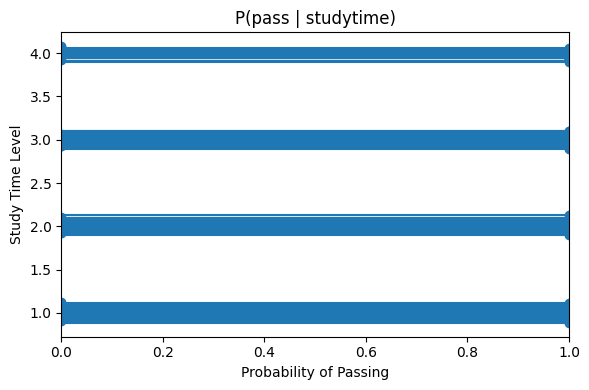

In [297]:
plt.figure(figsize=(6,4))
plt.hlines(
    y=p_pass_given_study.index,
    xmin=0,
    xmax=p_pass_given_study.values
)
plt.plot(p_pass_given_study.values, p_pass_given_study.index, "o")
plt.title("P(pass | studytime)")
plt.xlabel("Probability of Passing")
plt.ylabel("Study Time Level")
plt.xlim(0,1)
plt.tight_layout()
plt.show()


In [298]:
from scipy import stats

low = df[df["studytime"] <= 2]["G3"].dropna()
high = df[df["studytime"] > 2]["G3"].dropna()

t_stat, p_val = stats.ttest_ind(high, low, equal_var=False)

t_stat, p_val


(np.float64(4.044773141016449), np.float64(5.5973883945104614e-05))

C:\Users\user\AppData\Local\Temp\ipykernel_15832\2610847284.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([low, high], labels=["Low studytime", "High studytime"])


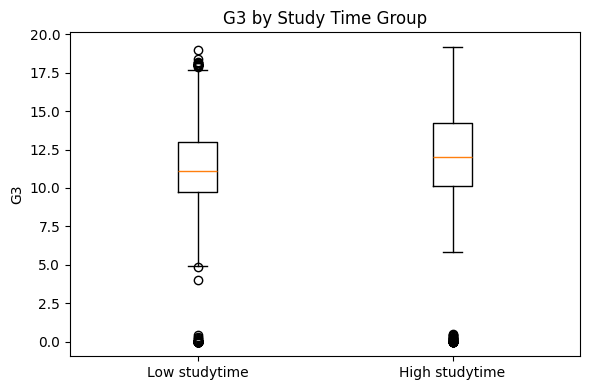

In [299]:
plt.figure(figsize=(6,4))
plt.boxplot([low, high], labels=["Low studytime", "High studytime"])
plt.title("G3 by Study Time Group")
plt.ylabel("G3")
plt.tight_layout()
plt.show()


In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [301]:
learning_style_cols = [
    c for c in df.columns
    if ("learn" in c.lower()) or ("class" in c.lower()) or ("learner" in c.lower())
]

ls = df[learning_style_cols].copy()

likert_map = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}

for c in ls.columns:
    if ls[c].dtype == "object":
        ls[c] = ls[c].map(likert_map)

ls = ls.dropna()

print("Columns used:", len(learning_style_cols))
print("Rows used:", len(ls))


Columns used: 13
Rows used: 433


In [302]:
X = ls.values
X_scaled = StandardScaler().fit_transform(X)


In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA full
pca_full = PCA()
X_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Table with all components
pca_table = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained))],
    "Explained Variance": explained,
    "Cumulative Variance": cum_explained
})

print(pca_table)


      PC  Explained Variance  Cumulative Variance
0    PC1            0.272549             0.272549
1    PC2            0.125707             0.398256
2    PC3            0.101660             0.499916
3    PC4            0.090694             0.590610
4    PC5            0.077534             0.668145
5    PC6            0.071008             0.739153
6    PC7            0.063174             0.802327
7    PC8            0.056132             0.858459
8    PC9            0.053700             0.912159
9   PC10            0.035170             0.947329
10  PC11            0.027853             0.975182
11  PC12            0.024818             1.000000
12  PC13            0.000000             1.000000


In [304]:
n_components = int(np.argmax(cum_explained >= 0.80) + 1)

print("PCA n_components (>=80% variance):", n_components)
print("Cumulative variance at that point:", cum_explained[n_components-1])


PCA n_components (>=80% variance): 7
Cumulative variance at that point: 0.8023267295430155


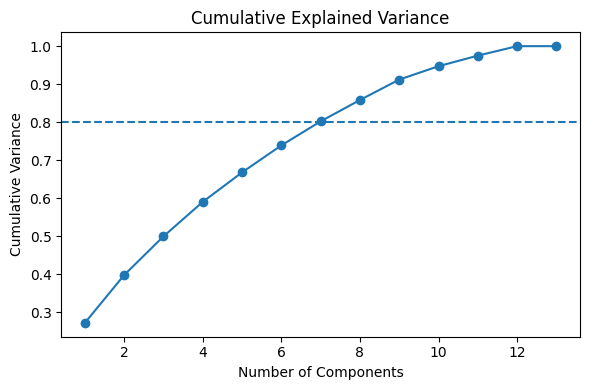

In [305]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker="o")
plt.axhline(0.80, linestyle="--")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.tight_layout()
plt.show()


In [306]:
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [307]:
learning_cols = [
    c for c in df.columns
    if ("learn" in c.lower()) or ("class" in c.lower()) or ("learner" in c.lower())
]

learning_df = df[learning_cols].copy()


In [308]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=learning_df.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# أهم المتغيرات في PC1 و PC2
loadings[["PC1", "PC2"]].abs().sort_values("PC1", ascending=False).head(5)


PC1       PC2
I learn more by reading textbooks than by liste...  0.363237  0.160183
I learn better by reading what the teacher writ...  0.350947  0.156028
When someone tells me how to do something in cl...  0.331600  0.007858
I learn better by reading than by listening to ...  0.314380  0.037968
I learn better in class when I listen to someone.   0.292344  0.152870

In [309]:
import pandas as pd

# 1) Loadings matrix (features x components)
loadings = pd.DataFrame(
    pca.components_.T,
    index=learning_df.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# 2) Function: show top contributing features for each PC
def top_features_for_pc(loadings_df, pc_name, top_n=8):
    s = loadings_df[pc_name].sort_values(key=lambda x: x.abs(), ascending=False)
    return s.head(top_n)

# 3) Print top features for first few PCs (مثلاً أول 5 PCs)
for i in range(min(5, pca.n_components_)):
    pc = f"PC{i+1}"
    print("\n" + "="*20, pc, "="*20)
    print(top_features_for_pc(loadings, pc, top_n=8))



==================== PC1 ====================
I learn more by reading textbooks than by listening to lectures.             0.363237
I learn better by reading what the teacher writes on the chalkboard.         0.350947
When someone tells me how to do something in class, I learn it better.       0.331600
I learn better by reading than by listening to someone.                      0.314380
I learn better in class when I listen to someone.                            0.292344
When I do things in class, I learn better.                                   0.282072
I understand things better in class when I participate in role-playing..1    0.273013
I remember things I have heard in class better than things I have read.      0.265630
Name: PC1, dtype: float64

==================== PC2 ====================
I remember things I have heard in class better than things I have read.    0.493155
I enjoy learning in class by doing experiments.                           -0.465713
I prefer to learn by doi

In [310]:
summary = {}

for i in range(pca.n_components_):
    pc = f"PC{i+1}"
    top5 = top_features_for_pc(loadings, pc, top_n=5)
    summary[pc] = list(top5.index)

pca_interpretation_table = pd.DataFrame.from_dict(summary, orient="index", columns=[f"Top{i}" for i in range(1,6)])
pca_interpretation_table


Top1  \
PC1  I learn more by reading textbooks than by list...   
PC2  I remember things I have heard in class better...   
PC3  I understand things better in class when I par...   
PC4    I enjoy learning in class by doing experiments.   
PC5  I learn more by reading textbooks than by list...   
PC6         When I do things in class, I learn better.   
PC7  When someone tells me how to do something in c...   

                                                  Top2  \
PC1  I learn better by reading what the teacher wri...   
PC2    I enjoy learning in class by doing experiments.   
PC3  I understand things better in class when I par...   
PC4  I learn better by reading than by listening to...   
PC5  I learn better in class when I listen to someone.   
PC6  When someone tells me how to do something in c...   
PC7         When I do things in class, I learn better.   

                                                  Top3  \
PC1  When someone tells me how to do something in c...   
PC2     I prefer to learn by doing something in class.   
PC3  I learn better in class when I listen to someone.   
PC4  I learn better by reading what the teacher wri...   
PC5  I learn better by reading what the teacher wri...   
PC6  I learn better by reading than by listening to...   
PC7  I learn better in class when the teacher gives...   

                                                  Top4  \
PC1  I learn better by reading than by listening to...   
PC2  I learn better in class when the teacher gives...   
PC3  I learn better in class when the teacher gives...   
PC4  I understand things better in class when I par...   
PC5  I remember things I have heard in class better...   
PC6  I remember things I have heard in class better...   
PC7  I learn better in class when I listen to someone.   

                                                  Top5  
PC1  I learn better in class when I listen to someone.  
PC2  I understand things better in class when I par...  
PC3     I prefer to learn by doing something in class.  
PC4  I learn more by reading textbooks than by list...  
PC5  I understand things better in class when I par...  
PC6  I learn more by reading textbooks than by list...  
PC7  I understand things better in class when I par...

In [311]:
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [312]:
K_range = range(2, 9)
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_pca)   # ← هنا الـ 8 components مستخدمين
    sil_scores.append(silhouette_score(X_pca, labels))

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best k (by silhouette):", best_k)
print("Silhouette scores:", dict(zip(K_range, sil_scores)))



Best k (by silhouette): 2
Silhouette scores: {2: 0.2301779107442596, 3: 0.17371117220957216, 4: 0.17029560087898116, 5: 0.16390061347243118, 6: 0.1875776315113927, 7: 0.18338921345201153, 8: 0.1850584999334427}


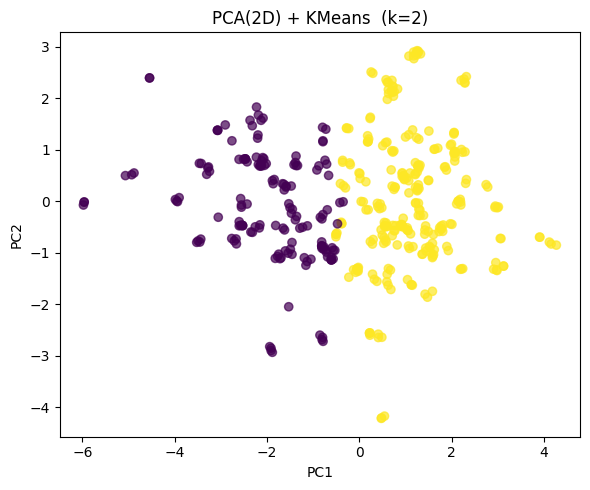

In [313]:
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, alpha=0.7)
plt.title(f"PCA(2D) + KMeans  (k={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
